In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [ ]:
#focus on who is renting what category the most instead of which movie category is the most abundant 
#so have sakila.rental,sakila.category,sakila.film
#do a count on the number of movies rented by category

In [91]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string) 

query = '''select f.title,f.rental_duration,f.rating,c.name as category
from sakila.film f
join sakila.film_category fc
on f.film_id = fc.film_id
join sakila.category c
on fc.category_id = c.category_id 
where c.name = 'Action' 
or c.name= 'Animation' 
or c.name ='Drama' 
or c.name = 'Comedy'
;
'''

data = pd.read_sql_query(query, engine)
data.head()

In [92]:
query1='''select f.film_id, f.title,f.rental_duration,f.rating,c.name as category,i.inventory_id,r.rental_id,r.customer_id
from sakila.film f
join sakila.film_category fc
on f.film_id = fc.film_id
join sakila.category c
on fc.category_id = c.category_id   
join sakila.inventory i  
on fc.film_id  = i.film_id
join sakila.rental r 
on i.inventory_id = r.inventory_id
where c.name = 'Action' or c.name= 'Animation' or c.name ='Drama' or c.name = 'Comedy'
;''' 
data1 = pd.read_sql_query(query1, engine)
data1.head()

,film_id,title,rental_duration,rating,category,inventory_id,rental_id,customer_id
0,19,AMADEUS HOLY,6,PG,Action,93,10895,77
1,19,AMADEUS HOLY,6,PG,Action,93,12268,39
2,19,AMADEUS HOLY,6,PG,Action,94,3150,34
3,19,AMADEUS HOLY,6,PG,Action,94,5072,254
4,19,AMADEUS HOLY,6,PG,Action,94,9080,276


In [93]:
# you want to predict the category of the film 

In [94]:
data1.isna().sum()

film_id            0
title              0
rental_duration    0
rating             0
category           0
inventory_id       0
rental_id          0
customer_id        0
dtype: int64

In [95]:
data1['category'].value_counts()

Animation    1166
Action       1112
Drama        1060
Comedy        941
Name: category, dtype: int64

In [96]:
data1.shape

(4279, 8)

In [97]:
data1.dtypes

film_id             int64
title              object
rental_duration     int64
rating             object
category           object
inventory_id        int64
rental_id           int64
customer_id         int64
dtype: object

In [98]:
data1.describe() 
#ignore the film id in this table 

,film_id,rental_duration,inventory_id,rental_id,customer_id
count,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000
mean,512.563216,4.896004,2344.409208,7989.066838,293.502921
std,291.261835,1.402322,1335.568002,4633.899760,171.055777
min,7.000000,3.000000,32.000000,6.000000,1.000000
25%,247.000000,4.000000,1116.000000,3977.500000,144.000000
50%,504.000000,5.000000,2324.000000,8021.000000,295.000000
75%,774.000000,6.000000,3542.000000,11938.500000,439.000000
max,1000.000000,7.000000,4581.000000,16049.000000,599.000000


In [99]:
data1.head(5)

,film_id,title,rental_duration,rating,category,inventory_id,rental_id,customer_id
0,19,AMADEUS HOLY,6,PG,Action,93,10895,77
1,19,AMADEUS HOLY,6,PG,Action,93,12268,39
2,19,AMADEUS HOLY,6,PG,Action,94,3150,34
3,19,AMADEUS HOLY,6,PG,Action,94,5072,254
4,19,AMADEUS HOLY,6,PG,Action,94,9080,276


In [100]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

/Users/Bijou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


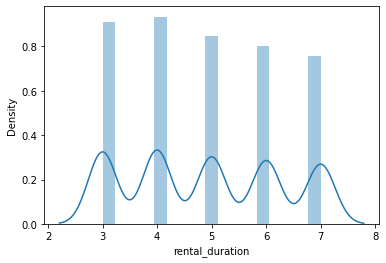

In [101]:
sns.distplot(data1['rental_duration'])
plt.show()

In [102]:
from sklearn.preprocessing import Normalizer 
import numpy as np  

x= data1.select_dtypes(include= np.number) 
#normalizing the data 

transformer = Normalizer().fit(x)
x_normalized = transformer.transform(x)
x= pd.DataFrame(x_normalized)

In [103]:
data1.dtypes

film_id             int64
title              object
rental_duration     int64
rating             object
category           object
inventory_id        int64
rental_id           int64
customer_id         int64
dtype: object

In [104]:
data1.head(2) 


,film_id,title,rental_duration,rating,category,inventory_id,rental_id,customer_id
0,19,AMADEUS HOLY,6,PG,Action,93,10895,77
1,19,AMADEUS HOLY,6,PG,Action,93,12268,39


In [105]:
cat= data1.select_dtypes(include = np.object)
cat = cat.drop(['category'],axis =1) 
categorical = pd.get_dummies(cat,columns=['title','rating']) 
# do you even need the film_id if you already have the title????



<ipython-input-105-41a9cda0717a>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat= data1.select_dtypes(include = np.object)


In [106]:
y = data1['category']
x=np.concatenate((x,categorical),axis=1)

In [107]:
data1.shape

(4279, 8)

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, random_state=100)

In [109]:
from sklearn.linear_model import LogisticRegression 
classification = LogisticRegression(random_state =0, solver='lbfgs',
                                   multi_class ='multinomial').fit(X_train,y_train)

In [110]:
len(y_test)

1712

In [111]:
len(predictions)

1712

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

1.0

In [84]:
predictions = classification.predict(X_test)

In [113]:
X_test.shape

(1712, 252)

In [114]:
#predictions = classification.predict(X_test)
#classification.score(predictions,y_test)

In [115]:
pd.Series(predictions).value_counts()

Animation    457
Action       446
Drama        421
Comedy       388
dtype: int64

In [116]:
y_test.value_counts()

Animation    457
Action       446
Drama        421
Comedy       388
Name: category, dtype: int64

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[446,   0,   0,   0],
       [  0, 457,   0,   0],
       [  0,   0, 388,   0],
       [  0,   0,   0, 421]])

[[446   0   0   0]
 [  0 457   0   0]
 [  0   0 388   0]
 [  0   0   0 421]]


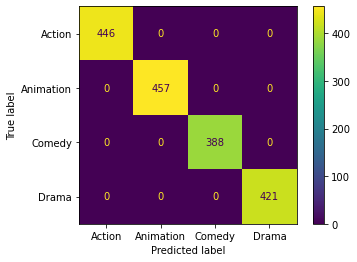

In [118]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
print(confusion_matrix(y_test,predictions))
plot_confusion_matrix(classification,X_test,y_test)
plt.show()

In [ ]:
#do the confusion matrix to see whats wrong with your model and where the predictions are having trouble 

In [ ]:
#add cost to rent and cost to replace 

In [ ]:
------------------------------------------------------------------

In [29]:
query3 = '''select f.film_id, f.title,f.rental_duration,f.rating,c.name as category,i.inventory_id,r.rental_id,r.customer_id
from sakila.film f
join sakila.film_category fc
on f.film_id = fc.film_id
join sakila.category c
on fc.category_id = c.category_id   
join sakila.inventory i  
on fc.film_id  = i.film_id
join sakila.rental r 
on i.inventory_id = r.inventory_id
where c.name = 'Sports' or c.name= 'Foreign' or c.name ='Family' or c.name = 'Documentary'
;
'''

data3 = pd.read_sql_query(query3, engine)
data3.head()

,film_id,title,rental_duration,rating,category,inventory_id,rental_id,customer_id
0,1,ACADEMY DINOSAUR,6,PG,Documentary,1,4863,431
1,1,ACADEMY DINOSAUR,6,PG,Documentary,1,11433,518
2,1,ACADEMY DINOSAUR,6,PG,Documentary,1,14714,279
3,1,ACADEMY DINOSAUR,6,PG,Documentary,2,972,411
4,1,ACADEMY DINOSAUR,6,PG,Documentary,2,2117,170


In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [31]:
data3.dtypes

film_id             int64
title              object
rental_duration     int64
rating             object
category           object
inventory_id        int64
rental_id           int64
customer_id         int64
dtype: object

In [32]:
data3.head(3)

,film_id,title,rental_duration,rating,category,inventory_id,rental_id,customer_id
0,1,ACADEMY DINOSAUR,6,PG,Documentary,1,4863,431
1,1,ACADEMY DINOSAUR,6,PG,Documentary,1,11433,518
2,1,ACADEMY DINOSAUR,6,PG,Documentary,1,14714,279


In [33]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
import numpy as np
X = data3.select_dtypes(include = np.number)

# Normalizing data
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized) 

In [37]:
cat = data3.select_dtypes(include = np.object)
cat = cat.drop(['category'], axis=1)
categorical = pd.get_dummies(cat, columns=['title','rating'])

<ipython-input-37-3406500e150f>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = data3.select_dtypes(include = np.object)


In [44]:
print(cat)

                 title rating
0     ACADEMY DINOSAUR     PG
1     ACADEMY DINOSAUR     PG
2     ACADEMY DINOSAUR     PG
3     ACADEMY DINOSAUR     PG
4     ACADEMY DINOSAUR     PG
...                ...    ...
4353   VICTORY ACADEMY  PG-13
4354   VICTORY ACADEMY  PG-13
4355   VICTORY ACADEMY  PG-13
4356   VICTORY ACADEMY  PG-13
4357   VICTORY ACADEMY  PG-13

[4358 rows x 2 columns]


In [38]:
y = data3['category']
X = np.concatenate((x, categorical), axis=1)

In [39]:
data3.shape

(4358, 8)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)
#always want to make sure the test set is never seen by the model until after 

In [41]:
classification.score(X_test, y_test) #tells you the correct number of predictions 71 is pretty bad 

ValueError: X has 280 features per sample; expecting 252

In [42]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

ValueError: X has 280 features per sample; expecting 252

In [ ]:
pd.Series(predictions).value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)